<a href="https://colab.research.google.com/github/saurabbh14/Python_Tut/blob/main/Practical_Course_ASM_3_Follow_along.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting serious in Python

So, now that you know all the basics of the Python programming language, let's get a bit more in-depth today! We will start with our first real scientific computation and get to know tools more adequate for the scientific scope of Python than `list` containers and list comprehension. 


## Short recap

But before we start, let's go over the things you learnt so far.

Here is a (not anymore so) short list of all the concepts you got to know already:

- Hello World
- Calling functions (`print()`, `math.exp()`)
- Basic data types in Python (`bool`, `float`, `int`, `str`)
- Math operations in Python (`+, -, *, /, //, %`)
- Defining functions (`morse()`)
- Loops (`for` and `while`)
- Lists (`[1, 2, 3, 4]`)
  - list indexing (`item_at_index = l[index]`)
  - list slicing (`sublist_until_index = l[:index]`)
  - list comprehension (`[func(x) for x in list_of_x]`)
- A basic representation of vectors in Python (as a `list`)
- A basic representation of matrices in Python (as a list of lists: `[[1,1], [1,2]]`)
- If-else statements (asking questions, making decisions)

Did you encounter any problems, syntax errors or other issues in your home-based Python journey? 

In [ ]:
# Code playground for questions, remarks, comments



## Introducing I/O

Until now, all we did was crush numbers internally. Most of you will work as experimentalists where you will encounter large amounts of measured spectra that you may want to process using Python. 

This is where I/O comes in, which is short of input/output. This is the large topic of reading data from a file (**input**), processing the data in it and writing new information to a file (**output**).

Our first goal will be to read vectors and matrices from files. To write a file in Colab (one that we can read), go to the "Files"-Tab on the right-hand side and on right click, you can upload a file from your computer. 

Otherwise just use the code below, it generates a file called `matrix.txt` in the folder `content`. 

The `!` signs at the beginning of the line indicate that this code is not run in Python, but in the Linux command line (a programming language called `bash`).


The `path` is an instruction for the computer where to locate a certain file. In Windows, paths look like `C:\Program Files\...`
, whereas in Linux paths start with a `/` (which is the base folder of the system), so here, our path is `/content/matrix.txt`.



In [ ]:
# This is a short Linux command to generate a matrix file
! printf '3:3\n1, 2, 3\n2, 3, 7\n11, 5, 6\n' > /content/matrix.txt

# You can view the content of the file using the following command:
! cat /content/matrix.txt

3:3
1, 2, 3
2, 3, 7
11, 5, 6


### Direct user input

If you want to ask the user of your program a question, you can use the `input()` function. In the parantheses put the question that you want to ask as a string. The return value (that you typically assign to a variable) is always a `str`ing.

See an example here:

In [ ]:
# Test ground
name = input("What's your name? ")
print("Hello, " + name + "!")


You find more exercise on user input using the `input()` function in the last homework notebook. As the function really is neither particularly interesting nor (in the grand scheme of things) exceptionally useful, let's continue with files!

### Reading and writing files

#### Reading files

Now that we have a file, we can open and read it using Python. There are two possible ways to open a file in Python. 

The first one you see here:

In [ ]:
# Open the file. The string is the `path` to the file. The second 
# arguments denotes what you intent to do with the file. "r" means 'read only'.
f = open("/content/matrix.txt", "r")

# Read the file. The `readlines()` method reads the entire content of the file 
# into a list of strings with each string being one line.
content = f.readlines()

# In this method, you explicitely need to close the file to avoid potential 
# corruption of the file
f.close()

# Now you can do things with the file, for example, print it:
print(content)
#print(f)


['3:3\n', '1, 2, 3\n', '2, 3, 7\n', '11, 5, 6\n']


The second possibility is shown here. In this approach, you don't need to close the file. It will be closed automatically as soon as the indented block after the `with`-line ends.

In [ ]:
# Open the file. The string is the `path` to the file.
with open("/content/matrix.txt", "r") as f:  #`f` is assigned automatically.
  headerl = f.readline()   # reads the first line
  content = f.readlines()  # reads the rest of the lines

# Now you can do things with the file, for example, print it:
print(headerl)
print(content)



Remember that all these lines are still of the type `string`. That means that we *cannot* yet use our matrix or vector functions on it. We need to process that data beforehand.

#### Processing the data

Now that we have the raw data, we can use it to generate our matrix of numbers.
To do so, we need to process the strings that we got from the file reading.

Three very helpful string functions are the string methods `.strip()`, `.split()` and `.join()`. Methods are functions that can be applied directly to a data type, like here:  

In [9]:
test_str = "   My grandma rides her motor-cycle in the chicken coop.\n"
print(test_str)

# The split() method splits strings. By default, it splits the string 
# at whitespaces (including newline characters).

splitted_ws = test_str.split()


print(splitted_ws)

# You can also supply the method with a character to split at.
splitted_ds = test_str.split("-")
#print(splitted_ds)

# The strip() methods trims whitespaces and newline characters ("\n") around a string.
stripped = test_str.strip()
#print(stripped)

# The join() method joins a list of strings using a delimiter string.
joined = "+".join(splitted_ws)
#print(joined)

# You can also chain these operations (they are applied from left to right).
strip_splitted = test_str.strip().split("-")
#print(strip_splitted)

   My grandma rides her motor-cycle in the chicken coop.

['My', 'grandma', 'rides', 'her', 'motor-cycle', 'in', 'the', 'chicken', 'coop.']


**Task**: Now you go! Open the `matrix.txt` file from above (you may use the same code from above) and process the `headerl` and `content` strings by `strip`ping and `split`ting. Convert the strings in the lists to `float`s

Hints: You can convert suitable strings to ints and floats using the `int()` and `float()` functions respectively. 

In [ ]:
# This is your function template
def read_matrix(path_to_matrix):

  # Read the data
 
  #print(list1)
  # Process the header to get a list of two integers (the outer and inner indices)

  # Process the content


read_matrix("/content/matrix.txt")



['1, 2, 3\n', '2, 3, 7\n', '11, 5, 6\n']


([3, 3], [[1.0, 2.0, 3.0], [2.0, 3.0, 7.0], [11.0, 5.0, 6.0]])

Great, now we can work with the matrix that we have saved in the file.

**BONUS-Task**: Modify your `read_matrix()` function to contain the possibility to check whether the matrix actually has the required dimensions. Also check (using a `for` loop) whether all the inner dimensions match.

In [ ]:
# This is your function template
def read_matrix(path_to_matrix):
  # Read the data
  with open(path_to_matrix, "r") as f: 
    headerl = f.readline()  
    content = f.readlines() 

  # Process the header to get a list of two integers (the outer and inner indices)
  indices = [int(str_int) for str_int in headerl.strip().split(":")]

  # Process the content
  matrix = [[float(item) for item in line.strip().split(",")] for line in content]
  
  # This part here is new!
  #dim_outer = len(matrix) 
  #dim_inner = len(matrix[0])

  #for row in matrix[1:]:
   # if len(row) != len(matrix[0]):
   #   raise Exception("The inner dimensions do not match") 

  return indices, matrix


indices, input_mat = read_matrix("/content/matrix.txt")

#### Writing files

Now that we have a product for the matrix multiplication, we may now want to store it back in a file. To do so, we need a function that can actually process that data back into strings and then write it back to a file.

Using the `open()` function, you can also open files that are not yet created. Using the parameter `"w"` instead of `"r"` you tell Python to open the file writeable. You can also simply `str`ingify a numerical value using the `str` function.

With the file handle (what we called `f`) comes a `.write(...)` as well as a `.writelines(...)` method that allows you to write a string or a list of strings (joined by newline characters) to the file represented by the handle.

**Task**: Build a function that takes a matrix and a filename and that writes the matrix and its dimensions to the specified file. 


In [ ]:
# This is your function template
def write_matrix(filename, matrix):
  # First, process the data




  return None


# Now call the function
write_matrix("/content/matrix_out.txt", input_mat)

# Use this code to look at the written file
! cat "/content/matrix_out.txt"

## Science with Python & the `NumPy` library

Now we have all the basics at hand to get going scientifically. The most prominent package in the scientific ecosystem in Python is called `numpy`. Numpy comes with its own, extremely powerful vector/array/list container type called `numpy.ndarray` (n-dimensional array). An array in computer programming is typically a data structure that has a set size and is homogeneous regarding its contents. This might seem like a disadvantage, however, it has some very specific advantages. 

These arrays are implemented to allow for *vectorised operations*, that means that one single operation (in code) is applied to all elements of the array at once. See the following example: 

First element:  1339.5645432926017
Last element:  555.1230689151517
First element (list):  1339.5645432926017
Last element (list):  555.1230689151517
True


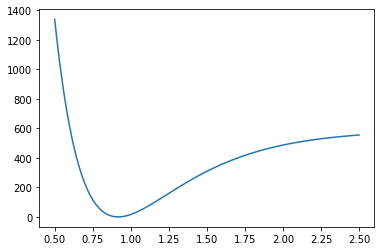

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Our trusty old Morse potential function.
# We only modify it by using the numpy version of `exp()`
def morse(r):
  beta = 2.203
  d = 590.7
  r_eq = 0.917

  e = d * (1 - np.exp(-beta * (r-r_eq))) ** 2

  return e

# Generate a 1000-component index in a set interval of [0.5, 2.5]
r_array = np.linspace(0.5, 2.5, num=1000) 
morse_array = morse(r_array)

# You can index and slice them just like lists:
print("First element: ", morse_array[0])
print("Last element: ", morse_array[-1])

# Like lists, ndarrays can be used in plotting
plt.plot(r_array, morse_array)

# You can even convert ndarrays to lists and vice versa
m_list = list(morse_array)
print("First element (list): ", m_list[0])
print("Last element (list): ", m_list[-1])

# The np.asarray function converts lists to ndarrays
new_m_array = np.asarray(m_list)

print(np.all(new_m_array == morse_array)) # See whether all the elements are the same

The numpy library is extremely mature in that the array container supports a ton of operations and the numpy library includes a variety of specialised functions to work on arrays and matrices.

Take for example the matrix multiplication. With Numpy, you will just write:

In [ ]:
# Build two matrices. The .reshape() method, well, reshapes the array.
matrix1 = np.arange(6).reshape([2,3])
matrix2 = np.arange(12).reshape([3,4])

# You can use the `@` operator ...
res = matrix1 @ matrix2
print(res)

# ... or use the function `np.matmul()`
res = np.matmul(matrix1, matrix2)
print(res)


[[20 23 26 29]
 [56 68 80 92]]
[[20 23 26 29]
 [56 68 80 92]]


And this is just the very tip of the iceberg. From now on, we will mainly live in the Numpy ecosystem to build our scientific calculations.